In [2]:
import numpy as np
import matplotlib.pyplot as plt

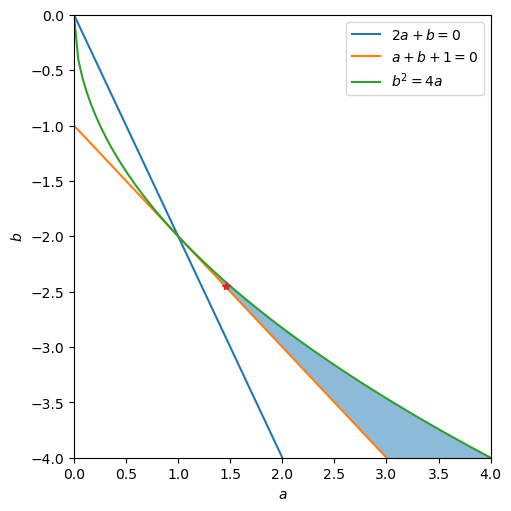

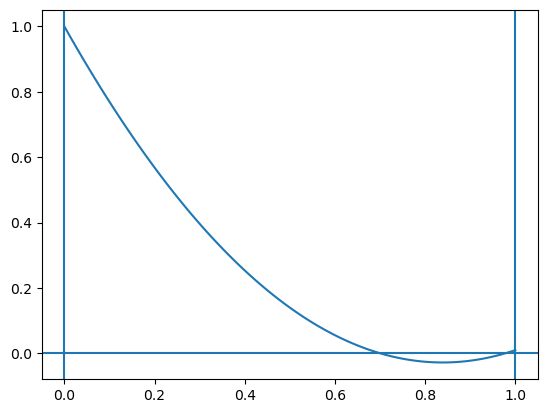

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=True)

a = np.linspace(0, 4, 100)
ax.plot(a, -2 * a, label=r"$2a+b=0$")
ax.plot(a, -a-1, label=r"$a+b+1=0$")
ax.plot(a, -2*np.sqrt(a), label=r"$b^2=4a$")

x = np.linspace(1, a[-1], 100)
y1 = -x - 1
y2 = -2 * np.sqrt(x) 
ax.fill_between(x, y1, y2, alpha=0.5)
ax.set_xlim(a[0], a[-1])
ax.set_ylim(-4, 0)
ax.set_xlabel(r"$a$")
ax.set_ylabel(r"$b$")


k = np.linspace(0, 1, 100)

w_AA = -0.85
w_BB = -1.6
w_AB = 1
w_BA = -0.1
a = w_AA * w_BB - w_AB * w_BA
b = w_AA + w_BB
plt.plot(a, b, "*")
ax.legend()
plt.show()
plt.close()

y = a * k**2 + b * k + 1
plt.plot(k, y)
plt.axhline(0)
plt.axvline(0)
plt.axvline(1)
plt.show()
plt.close()


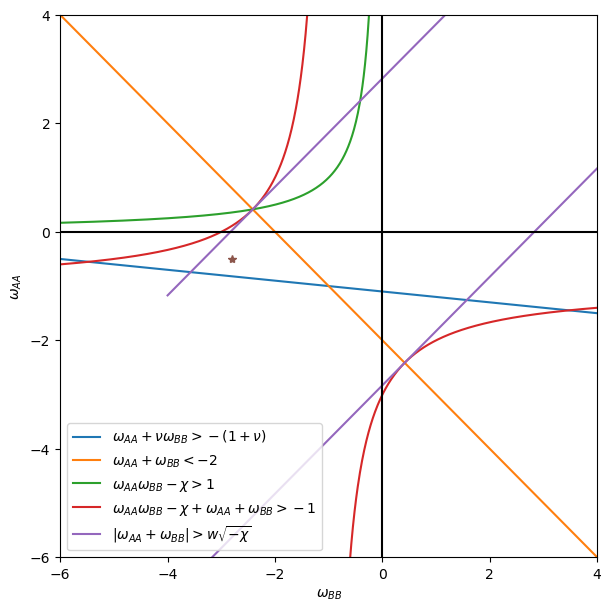

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), constrained_layout=True)
x = np.linspace(-6, 4, 500)

nu = 0.1
chi = -2

y1 = -(1+nu) - nu * x
y2 = -x -2

ax.plot(x, y1, label=r"$\omega_{AA}+\nu\omega_{BB}>-(1+\nu)$")
ax.plot(x, y2, label=r"$\omega_{AA}+\omega_{BB}<-2$")

x = np.linspace(-6, 0, 500, endpoint=False)
ax.plot(x, (1+chi)/x, label=r"$\omega_{AA}\omega_{BB}-\chi>1$")
ax.plot()

x = np.linspace(-6, -1, 500, endpoint=False)
line, = ax.plot(x, (chi-1-x)/(1+x), label=r"$\omega_{AA}\omega_{BB}-\chi+\omega_{AA}+\omega_{BB}>-1$")
x = np.linspace(-1, 4, 500)[1:]
ax.plot(x, (chi-1-x)/(1+x), c=line.get_c())

if chi < 0:
    x = np.linspace(-4, 4, 100)
    b = 2 * np.sqrt(-chi)
    line, = ax.plot(x, x+b, label=r"$|\omega_{AA}+\omega_{BB}|>w\sqrt{-\chi}$")
    ax.plot(x, x-b, c=line.get_c())
ax.set_xlabel(r"$\omega_{BB}$")
ax.set_ylabel(r"$\omega_{AA}$")

plt.plot(-2.8, -0.5, "*")
ax.axvline(0, c="k")
ax.axhline(0, c="k")

ax.set_xlim(-6, 4)
ax.set_ylim(-6, 4)
plt.legend()
plt.show()
plt.close()

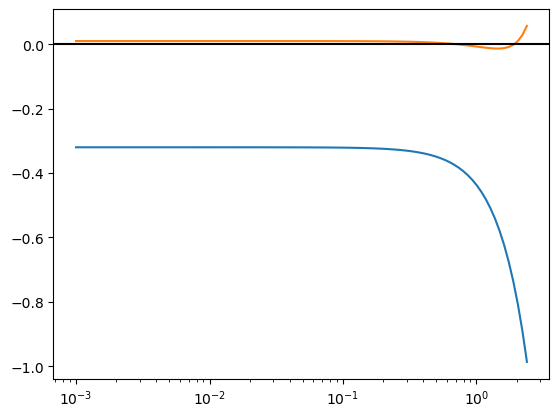

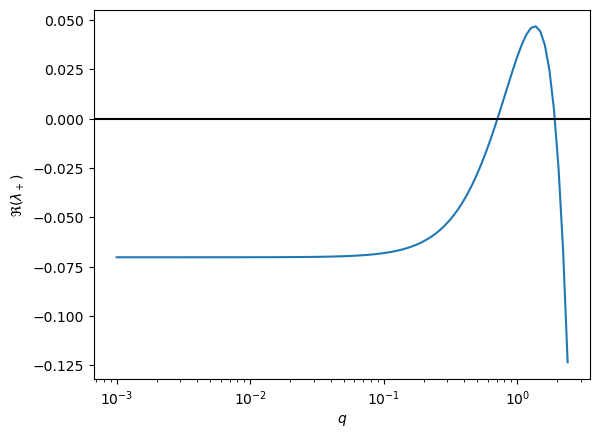

In [5]:
w_AA = -0.5
w_BB = -2.8
w_AB = 1
w_BA = -1.0

nu = 0.1

q = np.logspace(-3, 0.5 * np.log10(20/3), 100, endpoint=False)
k = 1-3/20 * q**2
T = -(1+nu) - k * (w_AA + nu * w_BB)
D = nu * (1+k*w_AA)*(1+k*w_BB) - nu * k**2 * w_AB * w_BA

plt.plot(q, T)
plt.plot(q, D)
plt.axhline(0, c="k")

# plt.ylim(-0.1, 0.1)

plt.xscale("log")
plt.show()
plt.close()

lamb = T + np.sqrt(T**2 - 4 * D)
plt.plot(q, lamb)
plt.axhline(0, c="k")
plt.ylabel(r"$\Re(\lambda_+)$")
plt.xlabel(r"$q$")
plt.xscale("log")
# plt.ylim()
plt.show()
plt.close()

In [6]:
def get_tilde_v_XY(eta_XY, rho_Y, bar_rho_Y, kappa=0.7):
    return 1 + kappa * np.tanh(eta_XY/kappa * (rho_Y - bar_rho_Y))

def get_tilde_v(eta_AA, eta_AB, eta_BA, eta_BB, rho_A, rho_B, bar_rho_A, bar_rho_B, kappa=0.7):
    drho_A = rho_A - bar_rho_A
    drho_B = rho_B - bar_rho_B
    inv_kappa = 1. / kappa
    v_AA = 1 + kappa * np.tanh(eta_AA * inv_kappa * drho_A)
    v_AB = 1 + kappa * np.tanh(eta_AB * inv_kappa * drho_B)
    v_BA = 1 + kappa * np.tanh(eta_BA * inv_kappa * drho_A)
    v_BB = 1 + kappa * np.tanh(eta_BB * inv_kappa * drho_B)
    return v_AA, v_AB, v_BA, v_BB

def get_v_A(rho_A, rho_B, bar_rho_A, bar_rho_B, etaAA, etaAB, bar_v_A=1., kappa=0.7):
    v_AA = get_tilde_v_XY(etaAA, rho_A, bar_rho_A, kappa)
    v_AB = get_tilde_v_XY(etaAB, rho_B, bar_rho_B, kappa) 
    return bar_v_A * v_AA * v_AB

def get_v_B(rho_A, rho_B, bar_rho_A, bar_rho_B, etaBA, etaBB, bar_v_B=1., kappa=0.7):
    v_BA = get_tilde_v_XY(etaBA, rho_A, bar_rho_A, kappa)
    v_BB = get_tilde_v_XY(etaBB, rho_B, bar_rho_B, kappa)
    return bar_v_B * v_BA * v_BB

def get_tilde_v_XY_derive(eta_XY, tilde_v_XY, kappa=0.7):
    return eta_XY * (1 - ((tilde_v_XY - 1)/kappa)**2)

def get_v0_omega(etaAA, etaAB, etaBA, etaBB, phiA, phiB, bar_rho_A, bar_rho_B, bar_vA=1., bar_vB=1., kappa=0.7):
    v_AA, v_AB, v_BA, v_BB = get_tilde_v(etaAA, etaAB, etaBA, etaBB, phiA, phiB, bar_rho_A, bar_rho_B, kappa)
    vA_0 = bar_vA * v_AA * v_AB
    vB_0 = bar_vB * v_BA * v_BB
    v_AA_deriv = get_tilde_v_XY_derive(etaAA, v_AA)
    v_AB_deriv = get_tilde_v_XY_derive(etaAB, v_AB)
    v_BA_deriv = get_tilde_v_XY_derive(etaBA, v_BA)
    v_BB_deriv = get_tilde_v_XY_derive(etaBB, v_BB)
    omega_AA = phiA * v_AA_deriv / v_AA
    omega_AB = phiA * v_AB_deriv / v_AB
    omega_BA = phiB * v_BA_deriv / v_BA
    omega_BB = phiB * v_BB_deriv / v_BB
    return vA_0, vB_0, omega_AA, omega_AB, omega_BA, omega_BB

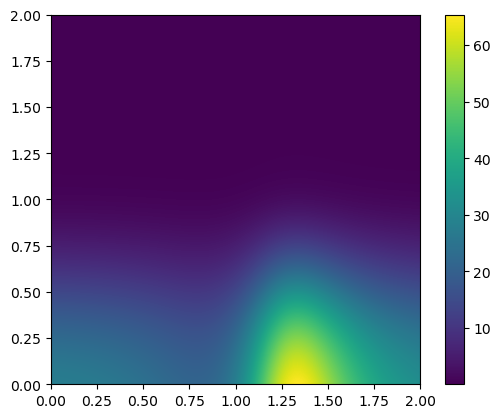

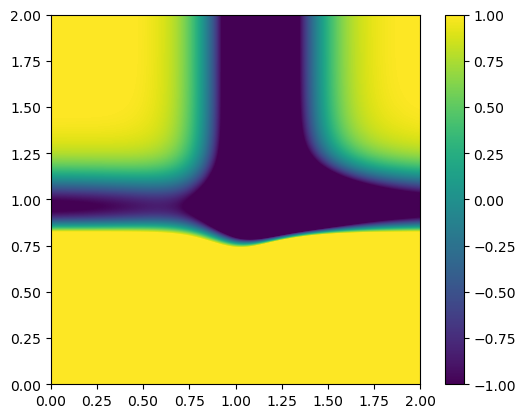

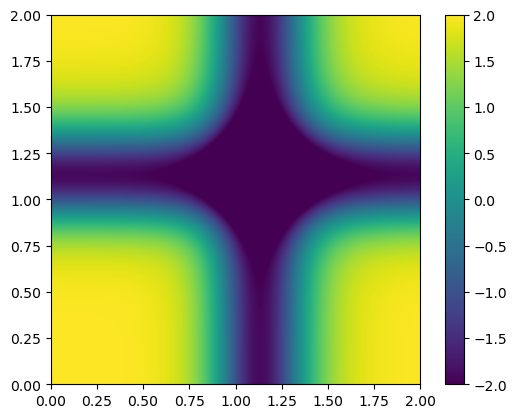

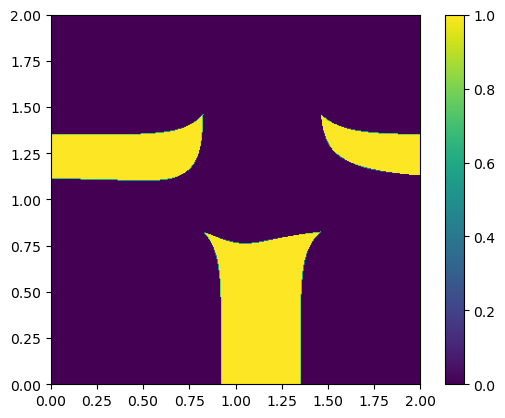

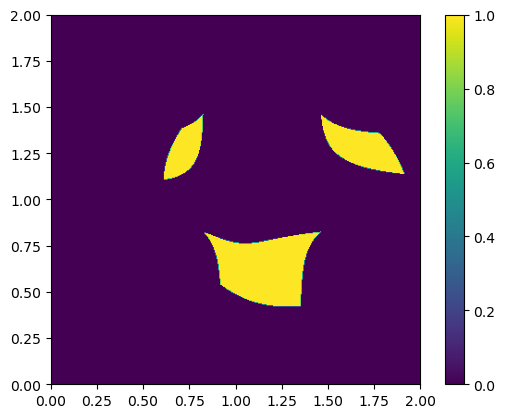

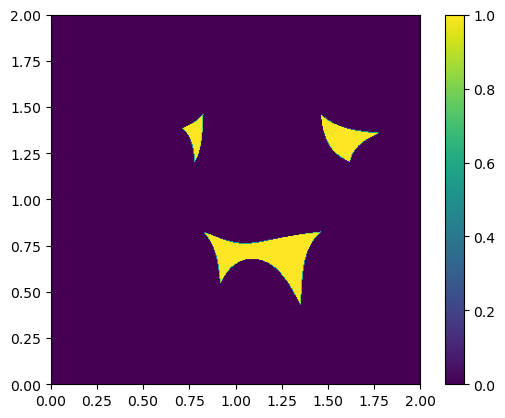

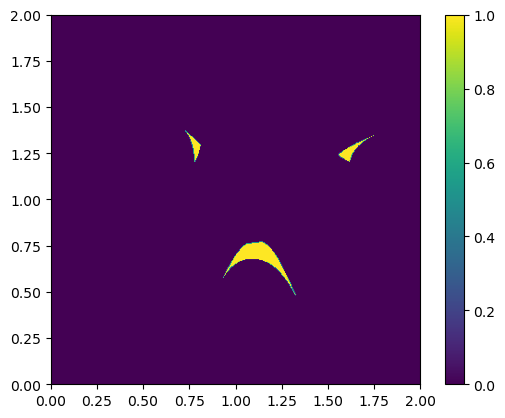

In [7]:
eta_AA = eta_BB = -3
eta_AB = 1.5
eta_BA = -eta_AB
Dr = 3

bar_rho_A = 1
bar_rho_B = 1

phi_A = np.linspace(0, 2, 400, endpoint=True)
phi_B = np.linspace(0, 2, 400, endpoint=True)

pA, pB = np.meshgrid(phi_A, phi_B)

vA_0, vB_0, omega_AA, omega_AB, omega_BA, omega_BB = get_v0_omega(eta_AA, eta_AB, eta_BA, eta_BB, pA, pB, bar_rho_A, bar_rho_B)

nu = vB_0 ** 2 / vA_0 ** 2
chi = omega_AB * omega_BA

extent = [0, phi_A.max(), 0, phi_B.max()]
plt.imshow(nu, origin="lower", extent=extent)
plt.colorbar()
plt.show()
plt.close()

plt.imshow(omega_AA + nu * omega_BB + (1+nu), origin="lower", extent=extent, vmin=-1, vmax=1)
plt.colorbar()
plt.show()
plt.close()

plt.imshow(omega_AA + omega_BB + 2, origin="lower", extent=extent, vmin=-2, vmax=2)
plt.colorbar()
plt.show()
plt.close()

M = np.zeros_like(pA)
mask = np.logical_and(omega_AA + nu * omega_BB + (1+nu)>0, omega_AA + omega_BB + 2 < 0)
M[mask] = 1
plt.imshow(M, origin="lower", extent=extent)
plt.colorbar()
plt.show()
plt.close()

mask = np.logical_and(M > 0.5, omega_AA * omega_BB - chi > 1)
M = np.zeros_like(pA)
M[mask] = 1
plt.imshow(M, origin="lower", extent=extent)
plt.colorbar()
plt.show()
plt.close()

mask = np.logical_and(M > 0.5, omega_AA * omega_BB - chi + omega_AA + omega_BB + 1 > 0)
M = np.zeros_like(pA)
M[mask] = 1
plt.imshow(M, origin="lower", extent=extent)
plt.colorbar()
plt.show()
plt.close()

mask = np.logical_and(M > 0.5, (omega_AA + omega_BB)**2 > 4 * (omega_AA * omega_BB - chi))
M = np.zeros_like(pA)
M[mask] = 1
plt.imshow(M, origin="lower", extent=extent)
plt.colorbar()
plt.show()
plt.close()



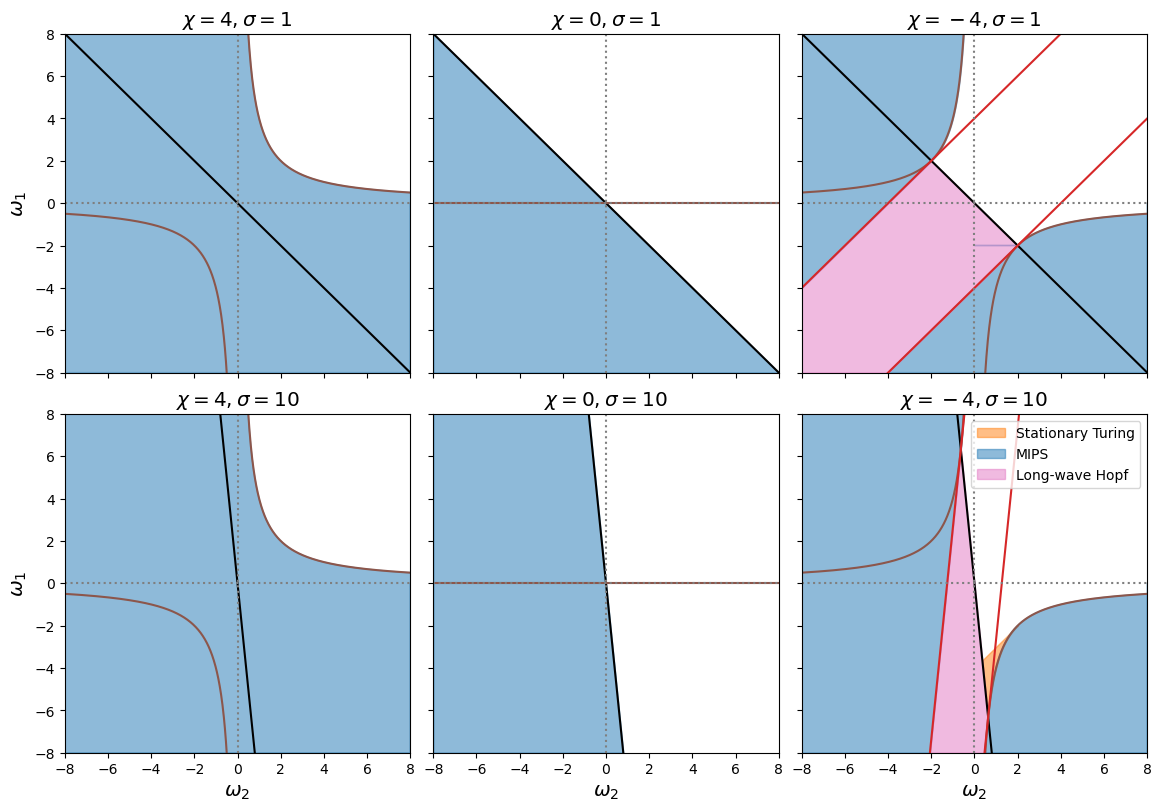

In [8]:
def fill_Turing(ax, sigma, chi, color="tab:orange"):
    if sigma > 1:
        x1 = np.sqrt(-chi) * 2 / (sigma+1)
        x2 = np.sqrt(-chi/sigma)
        x3 = np.sqrt(-chi)
        x = np.linspace(x1, x3)
        y1 = -sigma * x
        y2 = x - 2 * np.sqrt(-chi)
        mask = x > x2
        y1[mask] = chi / x[mask]
        ax.fill_between(x, y1, y2, label="Stationary Turing", alpha=0.5, color=color)
    elif sigma < 1:
        x1 = -np.sqrt(-chi/sigma)
        x2 = -np.sqrt(-chi) * 2 / (sigma+1)
        x3 = -np.sqrt(-chi)
        x = np.linspace(x1, x3)
        y1 = -sigma * x
        y2 = chi / x
        mask = x > x2
        y1[mask] = x[mask] + 2*np.sqrt(-chi)
        ax.fill_between(x, y1, y2, label="Stationary Turing", alpha=0.5, color=color)


def PD_w1_w2(sigma, chi, ax, xlim=8, ylim=8, show_legend=True, show_xlabel=True, show_ylabel=True, show_title=True):
    x = np.linspace(-xlim, xlim, 1000)

    # tr M
    # label=r"${\rm tr}\,\underline{\mathbf{M}}(0)$"
    line, = ax.plot(x, -sigma * x, c="k", label=None)

    # det M
    # label=r"${\rm det}\,\underline{\mathbf{M}}(0)=0$"
    mask = x > 0
    line, = ax.plot(x[mask], chi/x[mask], label=None, c="tab:brown")
    mask = x < 0
    ax.plot(x[mask], chi/x[mask], c=line.get_c())

    if chi < 0:
        b = 2 * np.sqrt(-sigma * chi)
        # label = r"$\left[{\rm tr}\,\underline{\mathbf{M}}(0)\right]^2-4{\rm det}\,\underline{\mathbf{M}}(0)=0$"
        line, = ax.plot(x, sigma * x + b, label=None, c="tab:red")
        ax.plot(x, sigma * x - b, c=line.get_c())
        fill_Turing(ax, sigma, chi)

    if chi < 0:
        yc = np.sqrt(-sigma * chi)
        xc = chi / yc

        y1 = np.linspace(-ylim, ylim, 1000)
        x1 = np.zeros_like(y1)
        mask = y1 < yc
        x1[mask] = (y1[mask] - b) / sigma
        mask = y1 >= yc
        x1[mask] = chi/y1[mask]
        ax.fill_betweenx(y1, -xlim, x1, color="tab:blue", alpha=0.5)

        y2 = np.linspace(-ylim, 0, 1000, endpoint=False)
        x2 = np.zeros_like(y2)
        mask = y2 < -yc
        x2[mask] = (y2[mask] + b) / sigma
        mask = y2 > -yc
        x2[mask] = chi / y2[mask]
        ax.fill_betweenx(y2, x2, xlim, color="tab:blue", alpha=0.5, label="MIPS")

        y3 = np.linspace(-ylim, yc, 1000)
        x3_l = (y3 - b) / sigma
        x3_r = np.zeros_like(y3)
        mask = y3 < -yc
        x3_r[mask] = (y3[mask] + b) / sigma
        mask = y3 >= -yc
        x3_r[mask] = -y3[mask] / sigma
        ax.fill_betweenx(y3, x3_l, x3_r, color="tab:pink", alpha=0.5, label="Long-wave Hopf")
    else:
        y1 = np.linspace(-ylim, ylim, 1000)
        if chi == 0:
            x1 = -y1/sigma
        else:
            x1 = np.zeros_like(y1)
            mask = y1 > 0
            x1[mask] = chi / y1[mask]
            mask = y1 <= 0
            x1[mask] = xlim
        ax.fill_betweenx(y1, -xlim, x1, color="tab:blue", alpha=0.5, label="MIPS")

    ax.axhline(0, linestyle=":", c="tab:grey")
    ax.axvline(0, linestyle=":", c="tab:grey")
    ax.set_xlim(-xlim, xlim)
    ax.set_ylim(-ylim, ylim)
    if show_legend:
        ax.legend(fontsize="large")
    if show_xlabel:
        ax.set_xlabel(r"$\omega_2$", fontsize="x-large")
    if show_ylabel:
        ax.set_ylabel(r"$\omega_1$", fontsize="x-large")
    if show_title:
        ax.set_title(r"$\chi=%g,\sigma=%g$" % (chi, sigma), fontsize="x-large")

sigma = 10
chi = -1
# plt.rc("text", usetex=True)

fig, axes = plt.subplots(2, 3, figsize=(11.5, 8), constrained_layout=True, sharex=True, sharey=True)

sigma_arr = [1, 10]
chi_arr = [4, 0, -4]

for row, sigma in enumerate(sigma_arr):
    for col, chi in enumerate(chi_arr):
        PD_w1_w2(sigma, chi, axes[row, col], show_legend=False, show_xlabel=row==len(sigma_arr)-1, show_ylabel=col==0)

axes[-1, -1].legend()
plt.show()
# plt.savefig("PD_Turing_NRQS_eq_rho.pdf")
plt.close()
# plt.rc("text", usetex=False)






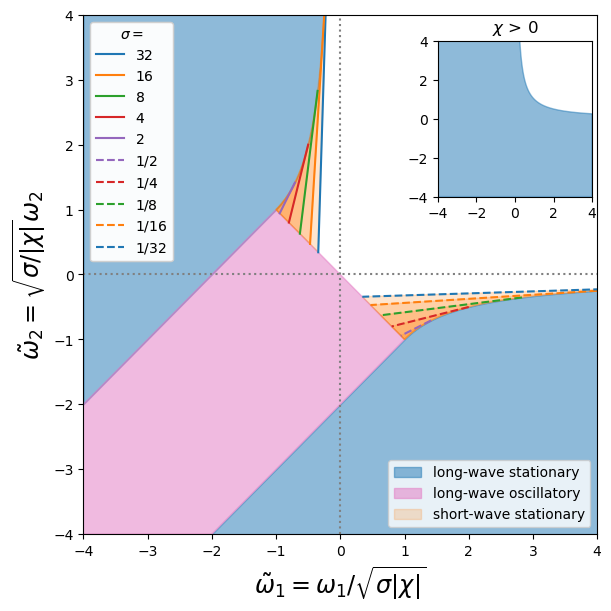

In [32]:
def plot_PD_rho_eq_w1_w2(ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(6, 6), constrained_layout=True)
        flag_show = True
    else:
        flag_show = False

    xmin, xmax = -4, 4
    ymin, ymax = -4, 4

    # long-wave stationary
    x1 = ymin + 2
    w1 = np.linspace(x1, xmax, 500)
    w2 = np.zeros_like(w1)
    w2[w1<1] = w1[w1<1] - 2
    w2[w1>=1] = -1 / w1[w1>=1]
    fill1 = ax.fill_between(w1, ymin, w2, color="tab:blue", alpha=0.5, label="long-wave stationary")
    ax.fill_betweenx(w1, xmin, w2, color="tab:blue", alpha=0.5)

    # long-wave oscillatory
    x = np.array([xmin, x1, 1, -1, xmin])
    y = np.array([ymin, ymin, -1, 1, x1])
    fill2,= ax.fill(x, y, color="tab:pink", alpha=0.5, label="long-wave oscillatory")

    fill_list = [fill1, fill2]
    line_list = []
    # sigam = 10
    sigma_array = np.array([32, 16, 8, 4, 2, 1/2, 1/4, 1/8, 1/16, 1/32])
    # sigma_array = np.array([9, 1/9])
    for i, sigma in enumerate(sigma_array):
        if i == 0:
            label="short-wave stationary"
        else:
            label = None
        if sigma > 1:
            x1 = -1/np.sqrt(sigma)
            y1 = -1 / x1
            x2 = -2 * np.sqrt(sigma) / (1+sigma)
            y2 = -x2
            line, = ax.plot([x1, x2], [y1, y2], label=r"$%g$" % sigma)

            x = np.linspace(-1, x1, 300)
            y = -1 / x
            xf = np.zeros(x.size + 1)
            yf = np.zeros(y.size + 1)
            xf[:-1] = x
            yf[:-1] = y
            xf[-1] = x2
            yf[-1] = y2
            fill3, = ax.fill(xf, yf, color="tab:orange", alpha=0.2, label=label)
        elif sigma < 1:
            x1 = 1/np.sqrt(sigma)
            y1 = -1 / x1
            x2 = 2 * np.sqrt(sigma) / (1+sigma)
            y2 = -x2
            line, = ax.plot([x1, x2], [y1, y2], "--", label=r"$1/%g$" % (1/sigma), c=line_list[sigma_array.size - i - 1].get_c())
            x = np.linspace(x1, 1, 300)
            y = -1 / x
            xf = np.zeros(x.size + 1)
            yf = np.zeros(y.size + 1)
            xf[:-1] = x
            yf[:-1] = y
            xf[-1] = x2
            yf[-1] = y2
            fill3, = ax.fill(xf, yf, color="tab:orange", alpha=0.2, label=label)
        if i == 0:
            fill_list.append(fill3)
        line_list.append(line)
    fill_legend = ax.legend(handles=fill_list, loc="lower right")
    line_legend = ax.legend(handles=line_list, title=r"$\sigma=$", loc="upper left")
    ax.add_artist(fill_legend)
    ax.add_artist(line_legend)


    ax.set_xlabel(r"$\tilde{\omega}_1=\omega_1/\sqrt{\sigma|\chi|}$", fontsize="xx-large")
    ax.set_ylabel(r"$\tilde{\omega}_2=\sqrt{\sigma / |\chi|}\omega_2$", fontsize="xx-large")

    ax.axhline(0, linestyle="dotted", c="grey")
    ax.axvline(0, linestyle="dotted", c="grey")

    ax.set_xlim(xmin, xmax)
    ax.set_ylim(xmin, xmax)
    # ax.plot(2.4, -0.4, 's')
    # ax.plot(2.4, -0.3, 'o')
    # ax.plot(2.0, -0.4, 's')
    # ax.plot(1.6, -0.4, 's')
    # ax.plot(1., -0.4, 's')
    # ax.plot(0.4, -0.4, 's')

    ax_in1 = ax.inset_axes([0.69, 0.65, 0.3, 0.3])

    x1 = np.linspace(1e-5, xmax, 1000)
    y1 = 1 / x1
    x2 = np.zeros(x1.size + 1)
    y2 = np.zeros(y1.size + 1)
    x2[1:] = x1
    y2[1:] = y1
    x2[0] = xmin
    y2[0] = ymin 
    ax_in1.fill_between(x2, ymin, y2, color="tab:blue", alpha=0.5)

    ax_in1.set_xlim(xmin, xmax)
    ax_in1.set_ylim(xmin, xmax)
    ax_in1.set_xticks([-4, -2, 0, 2, 4])
    ax_in1.set_title(r"$\chi$ > 0")

    if flag_show:
        plt.show()
        plt.close()


plot_PD_rho_eq_w1_w2()